# **Recency-Frequency-Monetary (RFM) Analysis:**

## **1. Import libraries:**

In [60]:
# Python Version 
import sys
sys.version

'3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Suppress specific warnings or set to show only once
import warnings
warnings.filterwarnings("once", category=UserWarning, module='matplotlib')

# Set a common style for plots
plt.style.use('ggplot')

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    # Add additional preprocessing steps if needed
    return df

# Function to visualize data
def visualize_data(df):
    # Add your data visualization code here
    pass

# Example usage:
# data_file = 'path/to/your/data.csv'
# data = load_and_preprocess_data(data_file)
# visualize_data(data)


## **2. Data Ingestion and Basic EDA:**

In [2]:
import pandas as pd

# Function to load and clean data
def load_and_clean_data(file_path):
    try:
        df = pd.read_csv(file_path)
        # Additional cleaning or preprocessing steps can be added here
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please check the file path.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# User-defined variables
trans_file_path = 'Transactions_Cleaned.csv'
cust_file_path = 'CustomerDemographic_Cleaned.csv'

# Load and clean transaction data
trans = load_and_clean_data(trans_file_path)

# Load and clean customer demographic data
cust = load_and_clean_data(cust_file_path)

# Check if data loading was successful
if trans is not None and cust is not None:
    print("Data loaded successfully.")
    # Additional analysis or visualization can be added here
else:
    print("Data loading failed. Please check the file paths and try again.")


Data loaded successfully.


In [3]:
# Displaying the first 5 transaction records
print("First 5 Transaction Records:")
trans.head(5)

First 5 Transaction Records:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [4]:
# Displaying information about the Transaction Dataset
total_records = trans.shape[0]
total_features = trans.shape[1]

print(f"Number of records (rows) in the Transaction Dataset: {total_records}")
print(f"Number of features (columns) in the Transaction Dataset: {total_features}")

Number of records (rows) in the Transaction Dataset: 19803
Number of features (columns) in the Transaction Dataset: 14


In [5]:
# Displaying the first 5 Customer Demographics records
print("First 5 Customer Demographics Records:")
cust.head(5)

First 5 Customer Demographics Records:


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,59
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,44


In [6]:
# Displaying information about the Customer Demographics Dataset
total_records_cust = cust.shape[0]
total_features_cust = cust.shape[1]

print(f"Number of records (rows) in the Customer Demographics Dataset: {total_records_cust}")
print(f"Number of features (columns) in the Customer Demographics Dataset: {total_features_cust}")


Number of records (rows) in the Customer Demographics Dataset: 3912
Number of features (columns) in the Customer Demographics Dataset: 13


In [7]:
# Merging the Transaction Dataset and Customer Demographics Dataset based on customer_id
merged_trans_cust = pd.merge(trans, cust, on='customer_id', how='inner')

# Displaying the first 5 records of the merged dataset
print("First 5 Records of Merged Dataset:")
merged_trans_cust.head(5)

First 5 Records of Merged Dataset:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42


In [8]:
# Displaying information about the Merged Dataset
total_records_merged = merged_trans_cust.shape[0]
total_features_merged = merged_trans_cust.shape[1]

print(f"Number of records (rows) in the Merged Dataset: {total_records_merged}")
print(f"Number of features (columns) in the Merged Dataset: {total_features_merged}")

Number of records (rows) in the Merged Dataset: 19354
Number of features (columns) in the Merged Dataset: 26


In [9]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

<b>The data-type of transaction_date column is not in date-time format. Hence the data-type of the column should be changed from object to datetime type.</b>

In [10]:
# Converting 'transaction_date' column to datetime format
merged_trans_cust['transaction_date'] = pd.to_datetime(merged_trans_cust['transaction_date'])

# Displaying the data type after conversion
print(f"'transaction_date' column converted to {merged_trans_cust['transaction_date'].dtype}")

'transaction_date' column converted to datetime64[ns]


# RFM Analysis Overview

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach used to segment customers based on their previous purchase transactions. This method categorizes customers according to how recently, how often, and how much they have made purchases. The goal is to group customers into segments for better-targeted marketing and personalized services.

## Key Components of RFM Analysis:

### Recency (R)
- **Definition:** Indicates how recently a customer made a purchase.
- **Calculation:** Number of days since the customer's last purchase (least recency).
- **Objective:** Identify customers who have recently engaged with the business.

### Frequency (F)
- **Definition:** Represents how often a customer makes purchases.
- **Calculation:** Total number of purchases made by the customer (high frequency).
- **Objective:** Recognize customers who frequently interact with the business.

### Monetary Value (M)
- **Definition:** Reflects the total monetary value of a customer's purchases.
- **Calculation:** Total amount of money spent by the customer (high monetary value).
- **Objective:** Identify customers with significant spending.

## Importance of RFM Analysis

RFM analysis helps businesses understand and target different customer behaviors:

- **Identifying Big Spenders:** Recognizing customers with high monetary value.
- **Assessing Purchase Frequency:** Determining how often customers make purchases.
- **Measuring Recency:** Analyzing how recently customers engaged with the business.

By grouping customers based on these factors, managers can tailor promotional campaigns and provide personalized services. This strategic approach ensures effective marketing efforts and enhances customer satisfaction.


In [11]:
# Find the Maximum Transaction Date or the Latest Transaction Date
max_transaction_date = max(merged_trans_cust['transaction_date']).date()

# Display the result
print(f"The maximum transaction date or the latest transaction date is: {max_transaction_date}")

The maximum transaction date or the latest transaction date is: 2017-12-30


In [12]:
# Taking the last transaction date as a reference date for comparison
last_transaction_date = max(merged_trans_cust['transaction_date']).date()

# Converting the last transaction date to a datetime object
reference_date = datetime.strptime(str(last_transaction_date), "%Y-%m-%d")

# Display the reference date
print(f"Reference Date for Recency Calculation: {reference_date}")

Reference Date for Recency Calculation: 2017-12-30 00:00:00


In [13]:
# Creating an RFM table
rfm_table = merged_trans_cust.groupby(['customer_id']).agg({
    'transaction_date': lambda date: (reference_date - date.max()).days,  # Recency
    'product_id': lambda prod_id: len(prod_id),  # Frequency
    'Profit': lambda p: sum(p)  # Monetary
})

# Renaming the columns for better clarity
rfm_table.columns = ['Recency', 'Frequency', 'Monetary']

# Displaying the first few records of the RFM table
print("RFM Table:")
rfm_table.head()

RFM Table:


,Recency,Frequency,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


In [14]:
# Checking the existing column names in the RFM table
print(f"Existing Column Names in RFM Table: {rfm_table.columns}")

Existing Column Names in RFM Table: Index(['Recency', 'Frequency', 'Monetary'], dtype='object')


In [15]:
# Renaming column names in the RFM table
rfm_table.rename(
    columns={
        'transaction_date': 'recency',  # Rename transaction_date to recency
        'product_id': 'frequency',  # Rename product_id to frequency
        'Profit': 'monetary'  # Rename Profit to monetary
    },
    inplace=True
)

# Displaying the updated column names
print(f"Updated Column Names in RFM Table: {rfm_table.columns}")


Updated Column Names in RFM Table: Index(['Recency', 'Frequency', 'Monetary'], dtype='object')


In [16]:
# Dividing recency, frequency, and monetary into 4 quartiles
try:
    rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, labels=['4', '3', '2', '1'])
    rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, labels=['1', '2', '3', '4'])
    rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, labels=['1', '2', '3', '4'])
except KeyError as e:
    print(f"Error: Column not found - {e}")

# Displaying the first few records of the updated RFM table with quartile columns
print("RFM Table with Quartile Columns:")
rfm_table.head()

Error: Column not found - 'recency'
RFM Table with Quartile Columns:


,Recency,Frequency,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


In [17]:
# RFM_table dataset

rfm_table

,Recency,Frequency,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [18]:
# Check if 'r_quartile', 'f_quartile', and 'm_quartile' columns exist in rfm_table
if all(col in rfm_table.columns for col in ['r_quartile', 'f_quartile', 'm_quartile']):
    # Calculation of RFM Score
    # Max weightage is given to recency, then frequency, and then monetary
    rfm_table.loc[:, 'rfm_score'] = 100 * rfm_table['r_quartile'].astype(int) + \
                                    10 * rfm_table['f_quartile'].astype(int) + \
                                    rfm_table['m_quartile'].astype(int)

    # Displaying the first few records of the RFM table with RFM scores
    print("RFM Table with RFM Scores:")
    print(rfm_table.head())
else:
    print("Error: Columns 'r_quartile', 'f_quartile', or 'm_quartile' do not exist in rfm_table.")


Error: Columns 'r_quartile', 'f_quartile', or 'm_quartile' do not exist in rfm_table.


In [19]:
print(rfm_table.columns)

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')


In [20]:
# Check if 'Recency', 'Frequency', and 'Monetary' columns exist in rfm_table
if all(col in rfm_table.columns for col in ['Recency', 'Frequency', 'Monetary']):
    # Calculation of RFM Score
    # Max weightage is given to Recency, then Frequency, and then Monetary
    rfm_table.loc[:, 'RFM_Score'] = 100 * rfm_table['Recency'].astype(int) + \
                                     10 * rfm_table['Frequency'].astype(int) + \
                                     rfm_table['Monetary'].astype(int)

    # Displaying the first few records of the RFM table with RFM scores
    print("RFM Table with RFM Scores:")
    print(rfm_table.head())
else:
    print("Error: Columns 'Recency', 'Frequency', or 'Monetary' do not exist in rfm_table.")


RFM Table with RFM Scores:
             Recency  Frequency  Monetary  RFM_Score
customer_id                                         
1                  7         11   3018.09       3828
2                128          3   2226.26      15056
3                102          8   3362.81      13642
4                195          2    220.57      19740
5                 16          6   2394.94       4054


In [21]:
# Assigning a title to a customer based on RFM score quartiles
# Use the correct column name 'RFM_Score' instead of 'rfm_score'
rfm_table['customer_title'] = pd.qcut(rfm_table['RFM_Score'], 4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

# Displaying the first few records of the updated RFM table with customer titles
print("RFM Table with Customer Titles:")
rfm_table.head()

RFM Table with Customer Titles:


,Recency,Frequency,Monetary,RFM_Score,customer_title
customer_id,,,,,
1,7,11,3018.09,3828,Bronze
2,128,3,2226.26,15056,Platinum
3,102,8,3362.81,13642,Platinum
4,195,2,220.57,19740,Platinum
5,16,6,2394.94,4054,Bronze


In [22]:
# RFM table dataset
rfm_table

,Recency,Frequency,Monetary,RFM_Score,customer_title
customer_id,,,,,
1,7,11,3018.09,3828,Bronze
2,128,3,2226.26,15056,Platinum
3,102,8,3362.81,13642,Platinum
4,195,2,220.57,19740,Platinum
5,16,6,2394.94,4054,Bronze
...,...,...,...,...,...
3496,256,4,2045.84,27685,Platinum
3497,52,3,1648.32,6878,Silver
3498,127,6,3147.33,15907,Platinum


### Merging both RFM Table with Transaction and Customer Tables

The RFM_Table dataframe is merged with the Transactions and Customer Demographics datasets, to gain depper insights of Customer Segemnts along with transactions. The dataframes are joined based on customer_ids from both the datasets

In [23]:
# Merging the 'merged_trans_cust' DataFrame with the 'rfm_table' DataFrame based on 'customer_id'
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, on='customer_id', how='inner')

# Displaying the first few records of the merged DataFrame
print("Merged DataFrame (cust_trans_rfm):")
cust_trans_rfm.head()

Merged DataFrame (cust_trans_rfm):


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,Age,Recency,Frequency,Monetary,RFM_Score,customer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,10.0,66,75,3,645.99,8175,Gold
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,Yes,10.0,66,75,3,645.99,8175,Gold
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,10.0,66,75,3,645.99,8175,Gold
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,Yes,10.0,42,20,7,4179.11,6249,Silver
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,Yes,10.0,42,20,7,4179.11,6249,Silver


In [24]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

<b> The datatypes of the columns looks fine.</b>

### Creating an Age Group Feature

In [25]:
import math

# Creating an 'Age_Group' column based on the 'Age' column
# Grouping ages into 10-year intervals
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x: (math.floor(x / 10) + 1) * 10)

# Displaying the first few records of the DataFrame with the new 'Age_Group' column
print("DataFrame with Age_Group Column:")
cust_trans_rfm.head()

DataFrame with Age_Group Column:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,Age,Recency,Frequency,Monetary,RFM_Score,customer_title,Age_Group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,66,75,3,645.99,8175,Gold,70
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,10.0,66,75,3,645.99,8175,Gold,70
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,66,75,3,645.99,8175,Gold,70
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,42,20,7,4179.11,6249,Silver,50
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,N,Yes,10.0,42,20,7,4179.11,6249,Silver,50


### Creating a Detail Customer title / tag based on RFM Score

An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.<br>
The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [26]:
# Function as a lookup to appropriate customer titles based on RFM score.
def cust_score_title_lkup(rfm_score):
    """
    Assigns a customer title based on the provided RFM score.

    Parameters:
    - rfm_score (int): RFM score of a customer.

    Returns:
    - str: Customer title.
    """

    if rfm_score >= 444:
        return 'Platinum Customer'
    elif 433 <= rfm_score < 444:
        return 'Very Loyal'
    elif 421 <= rfm_score < 433:
        return 'Becoming Loyal'
    elif 344 <= rfm_score < 421:
        return 'Recent Customer'
    elif 323 <= rfm_score < 344:
        return 'Potential Customer'
    elif 311 <= rfm_score < 323:
        return 'Late Bloomer'
    elif 224 <= rfm_score < 311:
        return 'Losing Customer'
    elif 212 <= rfm_score < 224:
        return 'High Risk Customer'
    elif 124 <= rfm_score < 212:
        return 'Almost Lost Customer'
    elif 112 <= rfm_score < 124:
        return 'Evasive Customer'
    else:
        return 'Lost Customer'

# Example usage:
# Assuming rfm_score_column contains RFM scores for customers
cust_trans_rfm['Customer_Title'] = cust_trans_rfm['RFM_Score'].apply(cust_score_title_lkup)

# Displaying the first few records of the DataFrame with the new 'Customer_Title' column
print("DataFrame with Customer_Title Column:")
cust_trans_rfm.head()

DataFrame with Customer_Title Column:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,Age,Recency,Frequency,Monetary,RFM_Score,customer_title,Age_Group,Customer_Title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Yes,10.0,66,75,3,645.99,8175,Gold,70,Platinum Customer
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Yes,10.0,66,75,3,645.99,8175,Gold,70,Platinum Customer
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Yes,10.0,66,75,3,645.99,8175,Gold,70,Platinum Customer
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Yes,10.0,42,20,7,4179.11,6249,Silver,50,Platinum Customer
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Yes,10.0,42,20,7,4179.11,6249,Silver,50,Platinum Customer


In [27]:
# Applying the cust_score_title_lkup function to create a new feature 'detail_cust_title'
cust_trans_rfm['detail_cust_title'] = cust_trans_rfm['RFM_Score'].apply(cust_score_title_lkup)

# Displaying the first few records of the DataFrame with the new 'detail_cust_title' column
print("DataFrame with detail_cust_title Column:")
cust_trans_rfm.head()

DataFrame with detail_cust_title Column:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,Recency,Frequency,Monetary,RFM_Score,customer_title,Age_Group,Customer_Title,detail_cust_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,66,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,10.0,66,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,10.0,66,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,42,20,7,4179.11,6249,Silver,50,Platinum Customer,Platinum Customer
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,10.0,42,20,7,4179.11,6249,Silver,50,Platinum Customer,Platinum Customer


In [28]:
# Function to provide ranks to the customers based on their title.
def get_rank(title):
    title_ranks = {
        'Platinum Customer': 1,
        'Very Loyal': 2,
        'Becoming Loyal': 3,
        'Recent Customer': 4,
        'Potential Customer': 5,
        'Late Bloomer': 6,
        'Losing Customer': 7,
        'High Risk Customer': 8,
        'Almost Lost Customer': 9,
        'Evasive Customer': 10,
    }

    return title_ranks.get(title, 11)  # Default to 11 if title is not found

# Example usage:
# Assuming 'detail_cust_title' column contains customer titles
cust_trans_rfm['Customer_Rank'] = cust_trans_rfm['detail_cust_title'].apply(get_rank)

# Displaying the first few records of the DataFrame with the new 'Customer_Rank' column
print("DataFrame with Customer_Rank Column:")
cust_trans_rfm.head()

DataFrame with Customer_Rank Column:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Age,Recency,Frequency,Monetary,RFM_Score,customer_title,Age_Group,Customer_Title,detail_cust_title,Customer_Rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,66,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer,1
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,66,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer,1
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,66,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer,1
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,42,20,7,4179.11,6249,Silver,50,Platinum Customer,Platinum Customer,1
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,42,20,7,4179.11,6249,Silver,50,Platinum Customer,Platinum Customer,1


In [29]:
# Applying the get_rank function to create a new feature 'rank'
cust_trans_rfm['rank'] = cust_trans_rfm['detail_cust_title'].apply(get_rank)

# Displaying the first few records of the DataFrame with the new 'rank' column
print("DataFrame with rank Column:")
cust_trans_rfm.head()

DataFrame with rank Column:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Recency,Frequency,Monetary,RFM_Score,customer_title,Age_Group,Customer_Title,detail_cust_title,Customer_Rank,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer,1,1
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer,1,1
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,75,3,645.99,8175,Gold,70,Platinum Customer,Platinum Customer,1,1
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,20,7,4179.11,6249,Silver,50,Platinum Customer,Platinum Customer,1,1
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,20,7,4179.11,6249,Silver,50,Platinum Customer,Platinum Customer,1,1


## **3. Exporting to CSV File:**

After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further <b>exploratory data analysis (EDA)</b> and this data will drive the <b>Sales Customer Segmenation Dashboard</b> developed in <b>Tableau</b>.

In [30]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [31]:
print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in final dataset : 19354


## **4. Data Analysis and Exploration:**

### New Customer vs Old Customer Age Distributions

In [32]:
# Loading the New Customers Dataset
new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

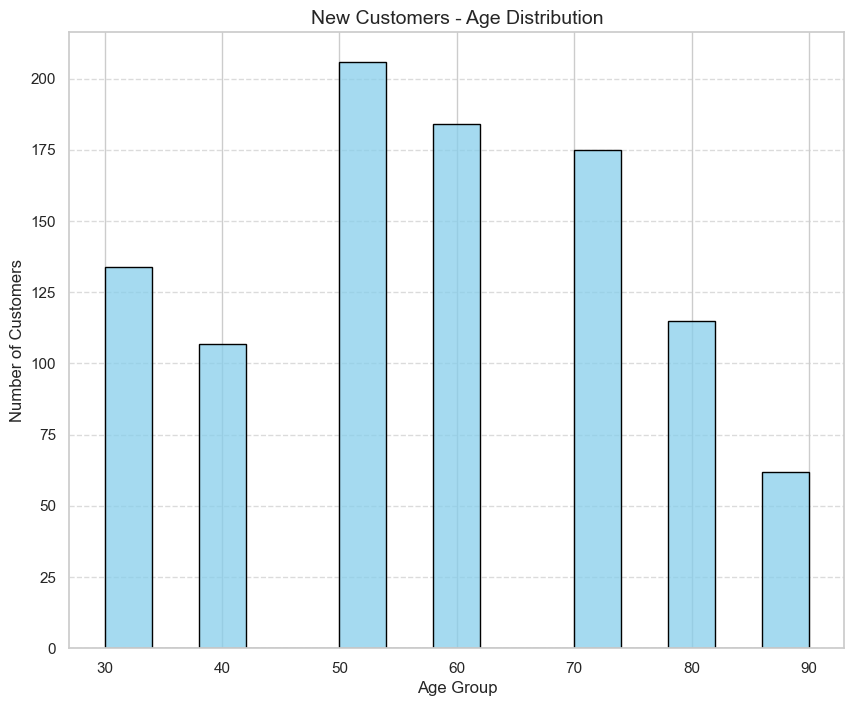

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(10, 8))

# Plot the age distribution using Seaborn's histplot
sns.histplot(new_cust['Age Group'], kde=False, bins=15, color='skyblue', edgecolor="black")

# Set labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('New Customers - Age Distribution', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('new_customers_age_distribution.png')

# Show the plot
plt.show()

<b>Here 20 = under 20, 30 = 20-29 age bracket</b>

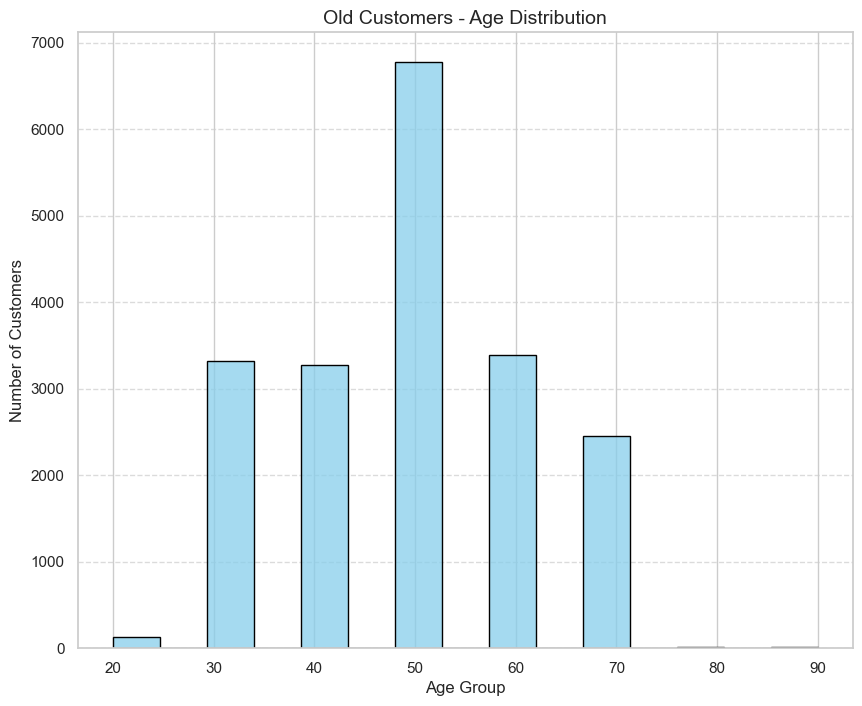

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(10, 8))

# Plot the age distribution using Seaborn's distplot
sns.histplot(cust_trans_rfm['Age_Group'], kde=False, bins=15, color='skyblue', edgecolor="black")

# Set labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Old Customers - Age Distribution', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('old_customers_age_distribution.png')

# Show the plot
plt.show()

<b>Here 20 = under 20, 30 = 20-29 age bracket</b>

### Bike related purchases over last 3 years by gender

Over the last 3 years approximately 51% of the buyers are women and 49% were male buyers.<br>
Female purchases are approximately 10,000 more than male (numerically). Gender wise majority of the bike sales comes from female customers.<br>

In [35]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}
                                                                 ).reset_index()

In [36]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [37]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [38]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


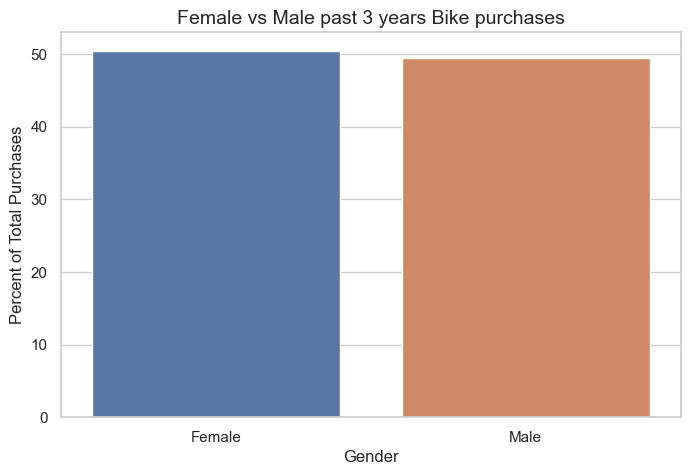

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(8, 5))

# Plot the bar chart using Seaborn's barplot
sns.barplot(x='gender', y='Percent_of_total', data=cust_bike_purchase_by_gender)

# Set labels and title
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percent of Total Purchases', fontsize=12)
plt.title('Female vs Male past 3 years Bike purchases', fontsize=14)

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('gender_bike_purchases_comparison.png')

# Show the plot
plt.show()

### Job Industry Customer Distribution

Among the <b>New Customers</b> the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. The samllest chunk of sales comes from customers in Agriculture sector and from Telecom sector with 3% sales only. Similar trend is observed among <b>Old Customers</b>.

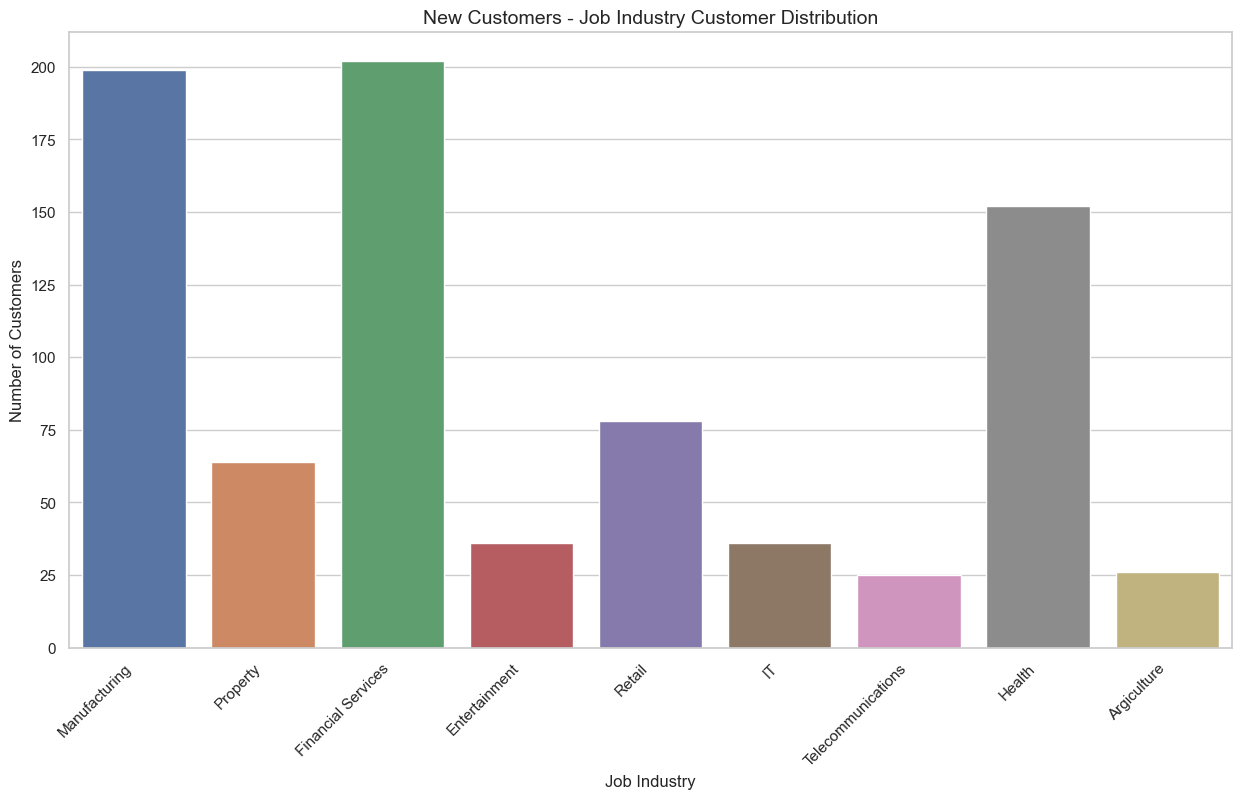

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(15, 8))

# Plot the count distribution using Seaborn's countplot
sns.countplot(x='job_industry_category', data=new_cust[~(new_cust['job_industry_category']=='Missing')])

# Set labels and title
plt.xlabel('Job Industry', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('New Customers - Job Industry Customer Distribution', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('new_customers_job_industry_distribution.png')

# Show the plot
plt.show()

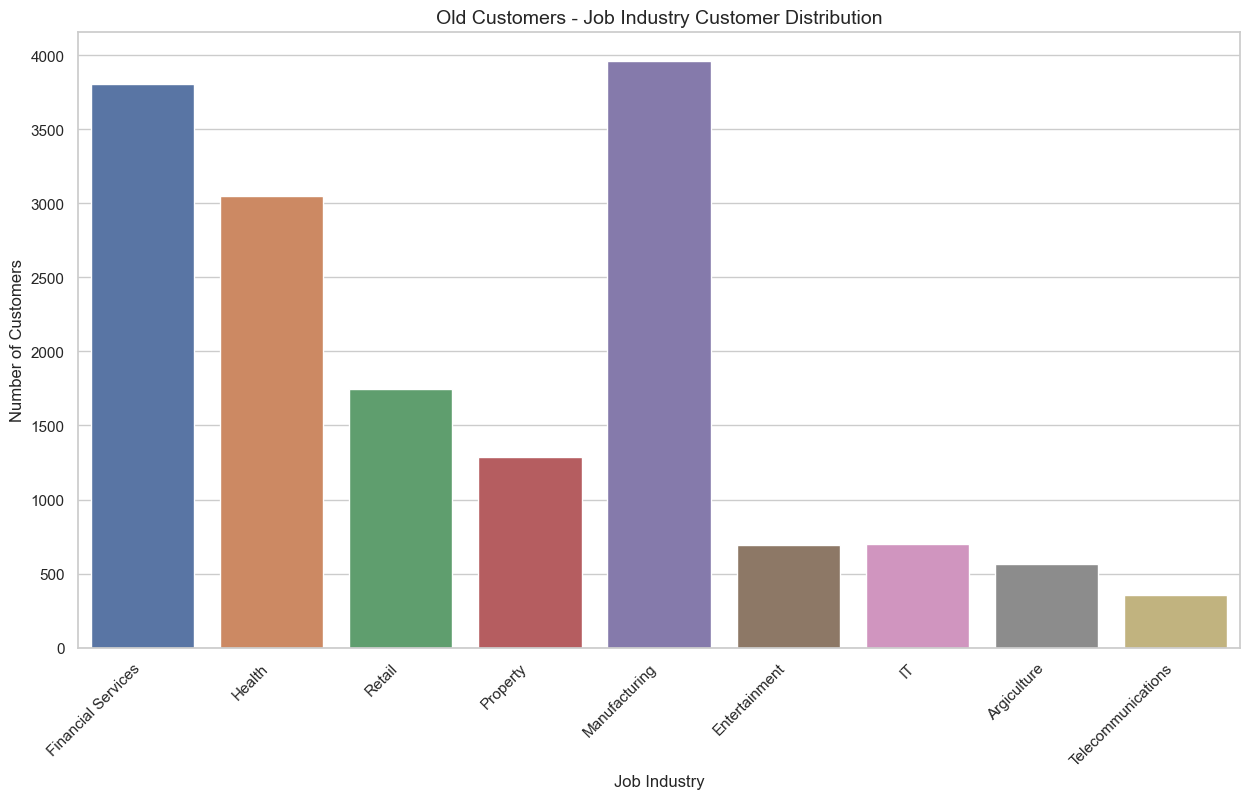

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(15, 8))

# Plot the count distribution using Seaborn's countplot
sns.countplot(x='job_industry_category', data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')])

# Set labels and title
plt.xlabel('Job Industry', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Old Customers - Job Industry Customer Distribution', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('old_customers_job_industry_distribution.png')

# Show the plot
plt.show()

### Wealth Segmentation by Age Group

Across all Age Groups the maximum number of customers are classified as 'Mass Customers'. The next being 'High Net Worth'. However among 40-49 aged customers 'Affluent Customers' outperforms the 'High Net Worth' customers.

<b>New Customers</b>

In [42]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [43]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,30,41
1,Affluent Customer,40,20
2,Affluent Customer,50,51
3,Affluent Customer,60,45
4,Affluent Customer,70,35
5,Affluent Customer,80,30
6,Affluent Customer,90,13
7,High Net Worth,30,30
8,High Net Worth,40,34
9,High Net Worth,50,52


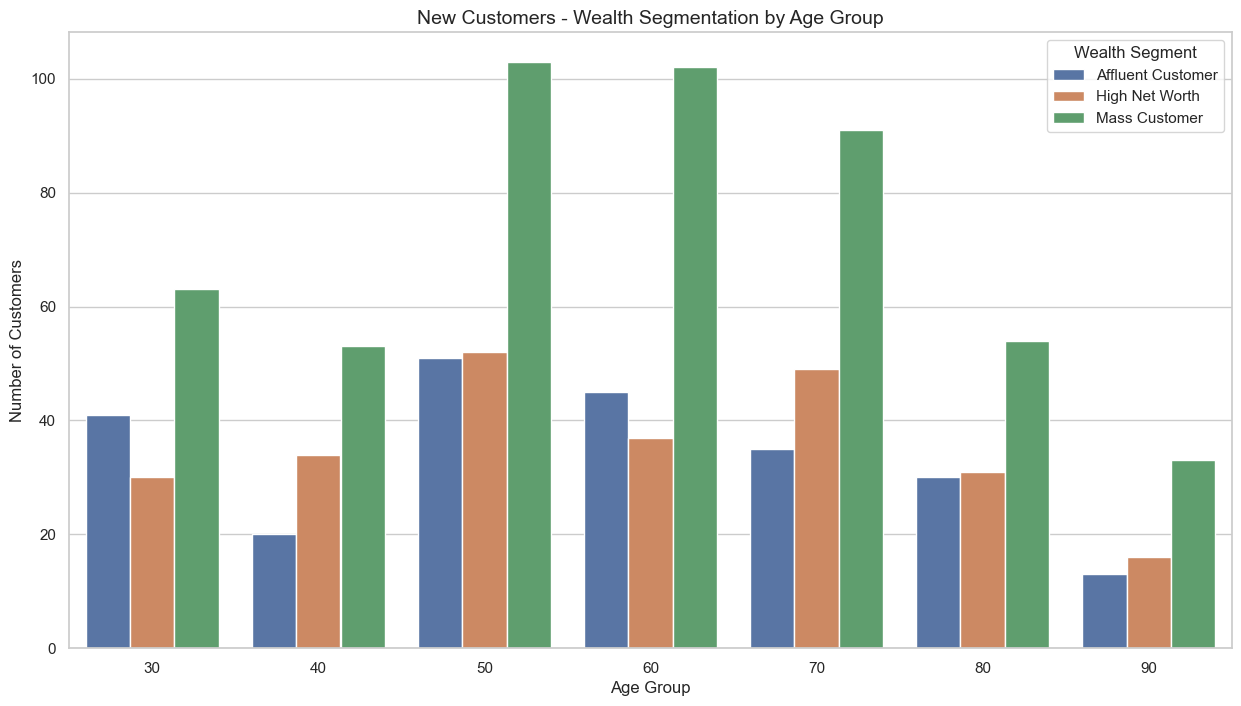

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(15, 8))

# Plot a barplot using Seaborn
sns.barplot(x='Age Group', y='Number of Customers', hue='wealth_segment', data=wealth_age_seg_new)

# Set labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('New Customers - Wealth Segmentation by Age Group', fontsize=14)

# Add legend for better interpretation
plt.legend(title='Wealth Segment', title_fontsize='12', loc='upper right')

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('new_customers_wealth_segmentation_age_group.png')

# Show the plot
plt.show()

* In all the age groups the most number of customers are 'Mass Customers'.
* The 2nd largest customer base being the 'High Net Worth' group.<br>In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group

<b>Old Customers</b>

Similar treand (like that of New Customers) is observed among Old Customers

In [45]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()

In [46]:
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)

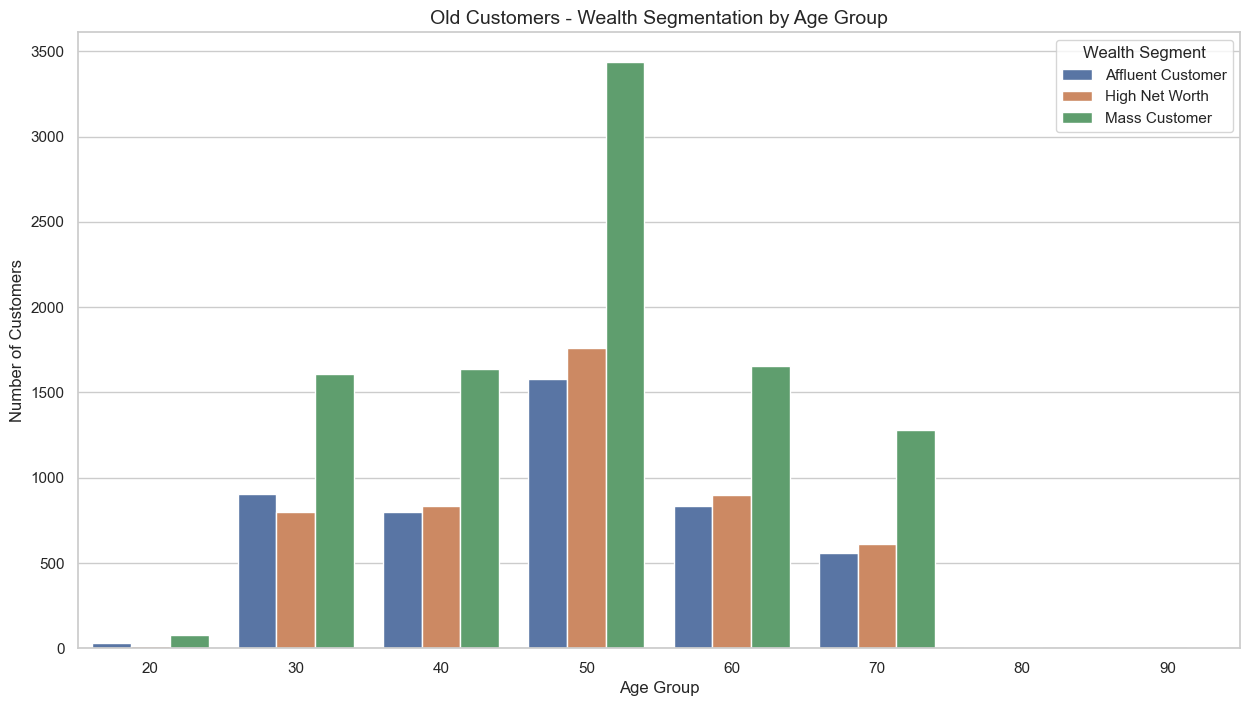

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(15, 8))

# Plot a barplot using Seaborn
sns.barplot(x='Age_Group', y='Number of Customers', hue='wealth_segment', data=wealth_age_seg_old)

# Set labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Old Customers - Wealth Segmentation by Age Group', fontsize=14)

# Add legend for better interpretation
plt.legend(title='Wealth Segment', title_fontsize='12', loc='upper right')

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('old_customers_wealth_segmentation_age_group.png')

# Show the plot
plt.show()

### Car owner across each State

The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia. <br>
In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively more people who own the car.

In [48]:
# Loading the Customer Address Dataset.
cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [49]:
# Merging the RFM data with Customer Address dataset.
cust_trans_addr = pd.merge(cust_trans_rfm , cust_addr_info, left_on = 'customer_id' , 
                           right_on = 'customer_id', how='inner')

In [50]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))

RFM table Records count : 19354
Address Table Records count :3999


In [51]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [52]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


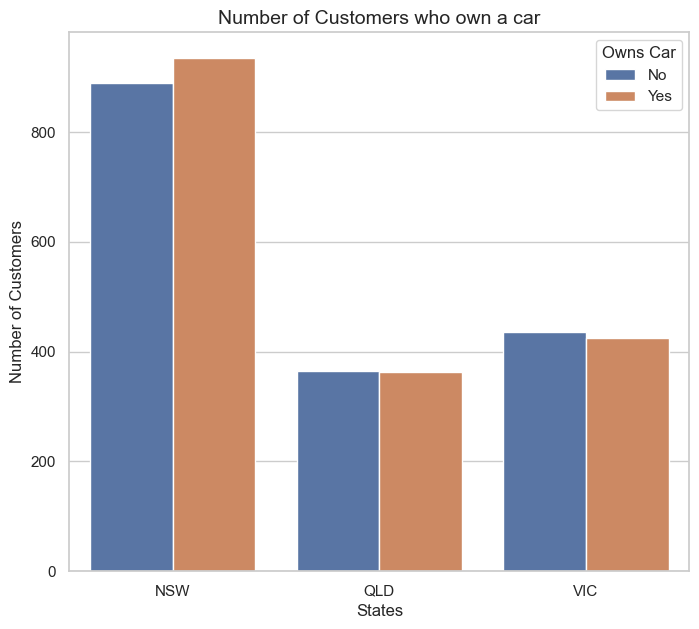

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(8, 7))

# Plot a barplot using Seaborn
sns.barplot(x='state', y='Number of Customers', hue='owns_car', data=state_car_owners)

# Set labels and title
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Number of Customers who own a car', fontsize=14)

# Add legend for better interpretation
plt.legend(title='Owns Car', title_fontsize='12', loc='upper right')

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('customer_car_ownership_by_state.png')

# Show the plot
plt.show()

NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW

## **5. RFM Analysis Scatter Plots:**

### Recency vs Monetary

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

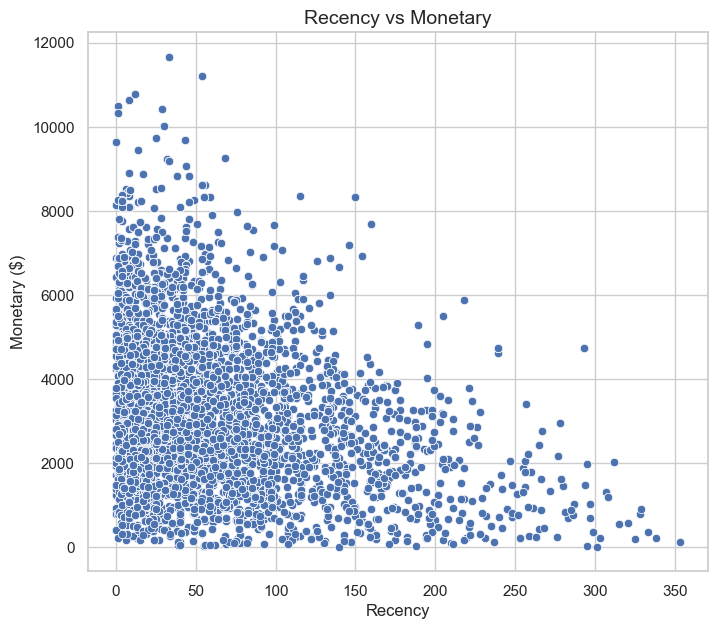

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(8, 7))

# Plot a scatter plot using Seaborn
sns.scatterplot(x='Recency', y='Monetary', data=cust_trans_rfm)

# Set labels and title
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Monetary ($)', fontsize=12)
plt.title('Recency vs Monetary', fontsize=14)

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('recency_vs_monetary_scatter.png')

# Show the plot
plt.show()

### Frequency vs Monetary

Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business. 

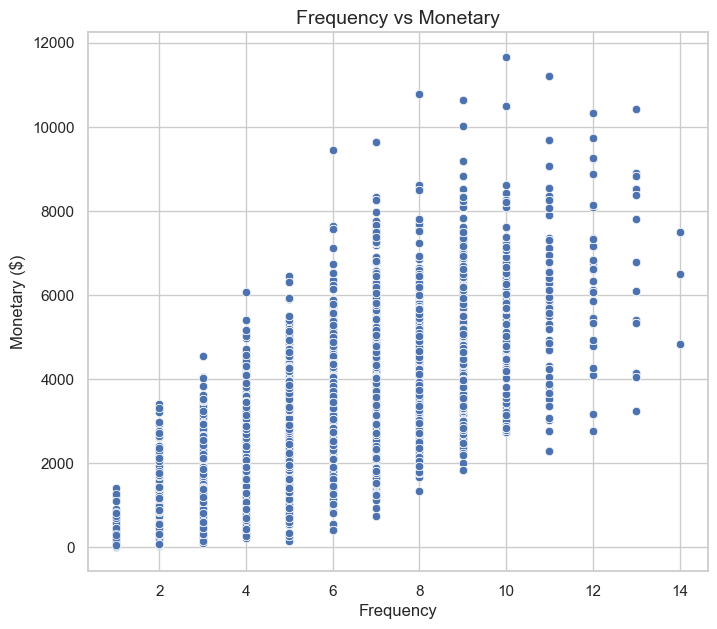

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(8, 7))

# Plot a scatter plot using Seaborn
sns.scatterplot(x='Frequency', y='Monetary', data=cust_trans_rfm)

# Set labels and title
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Monetary ($)', fontsize=12)
plt.title('Frequency vs Monetary', fontsize=14)

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('frequency_vs_monetary_scatter.png')

# Show the plot
plt.show()

## Customer Segment Distribution

<b>Finally we can plot the Number of Customers present under a Customer Segment.</b>

In [56]:
# Calculating the number of unique customers under a customer title.
cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [57]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
0,Platinum Customer,1,3415
1,Recent Customer,4,1


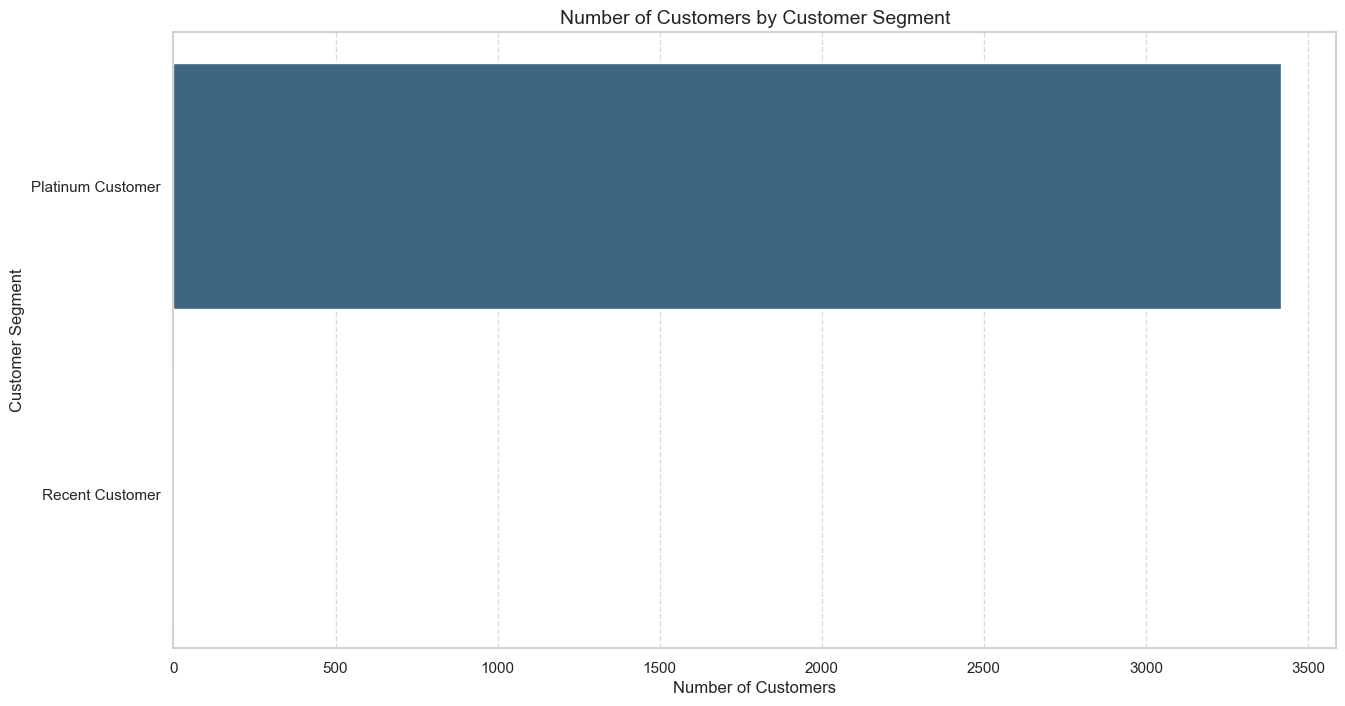

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis with specified size
plt.figure(figsize=(15, 8))

# Plot a horizontal bar plot using Seaborn
sns.barplot(x='Number of Customers', y='detail_cust_title', data=cust_per_title, palette='viridis')

# Set labels and title
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.title('Number of Customers by Customer Segment', fontsize=14)

# Add a vertical grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the figure to a file (adjust the path and filename as needed)
plt.savefig('number_of_customers_by_segment_barplot.png')

# Show the plot
plt.show()